In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Style.mplstyle')
import pandas as pd
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime
import matplotlib.dates as mdates
import linecache
from iminuit import Minuit
from read_data_functions import *
from plot_functions import *
from calculations import *
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [24]:
parent_path = '../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/pilot kbh hovedbanegaard and noerregade//rawdata/particle/'
discmini_names = ['dm5_20240917_1009', 'dm1_20240917_1008', 'dm4_20240917_1007', 'dm5_20240917_1105', 'dm1_20240917_1528', 'dm4_20240917_1103', 
                  'dm5_20240919_1142', 'dm1_20240919_1140']

discmini = read_discmini(f'{path}discmini/', parent_path, discmini_names, '\t')
ma200 = read_csv_BC(f'{path}ma200/', parent_path, 0)
LCS = read_csv(f'{path}Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)

titles = ['LCS0076', 'LCS0104']
df_keys = ['PN<1', 'PN<2.5', 'PN<10']

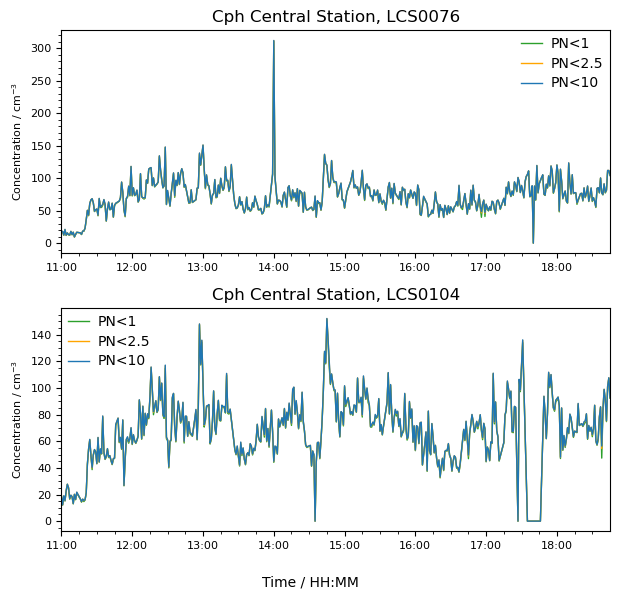

In [20]:
colors = ['tab:green', 'orange', 'tab:blue']

fig, axs = plt.subplots(2, 1, figsize = (6.3, 6))

for i, key in enumerate(df_keys):
    plot_LCS(axs, fig, LCS, ['2024-09-17 LCS0076', '2024-09-17 LCS0104'], '2024-09-17 11:00:00', '2024-09-17 18:45:00', key, 'Time', ['Concentration / cm$^{-3}$', 'Concentration / cm$^{-3}$'], colors[i])

for ax, ttl in zip(axs, titles):
    ax.legend(df_keys)
    ax.set(title = f'Cph Central Station, {ttl}')
fig.tight_layout()
fig.savefig(f'Screening/CphC_screening.png', dpi = 600)

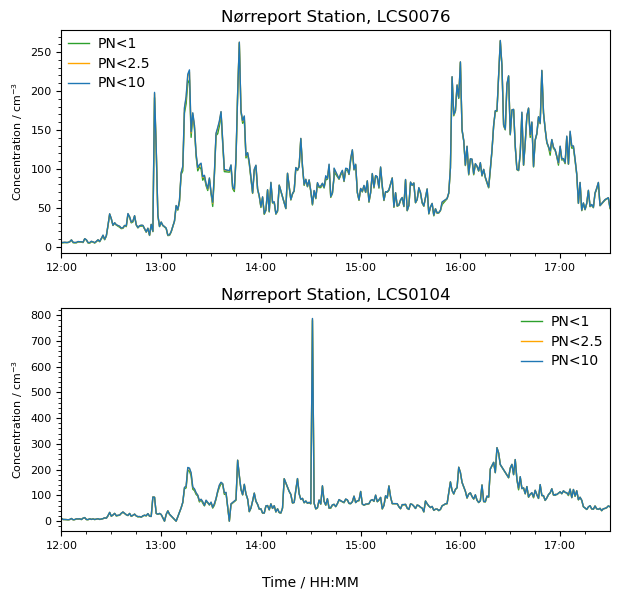

In [22]:
colors = ['tab:green', 'orange', 'tab:blue']

fig, axs = plt.subplots(2, 1, figsize = (6.3, 6))

for i, key in enumerate(df_keys):
    plot_LCS(axs, fig, LCS, ['2024-09-19 LCS0076', '2024-09-19 LCS0104'], '2024-09-19 12:00:00', '2024-09-19 17:30:00', key, 'Time', ['Concentration / cm$^{-3}$', 'Concentration / cm$^{-3}$'], colors[i])

for ax, ttl in zip(axs, titles):
    ax.legend(df_keys)
    ax.set(title = f'Nørreport Station, {ttl}')
fig.tight_layout()
fig.savefig(f'Screening/Nørreport_screening.png', dpi = 600)

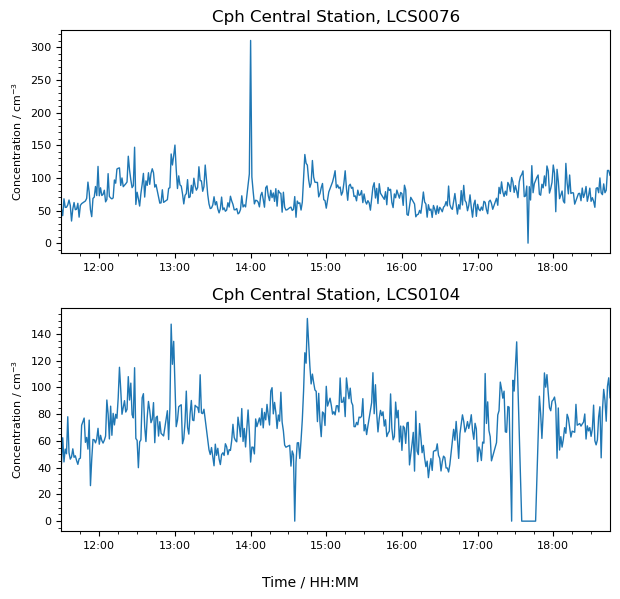

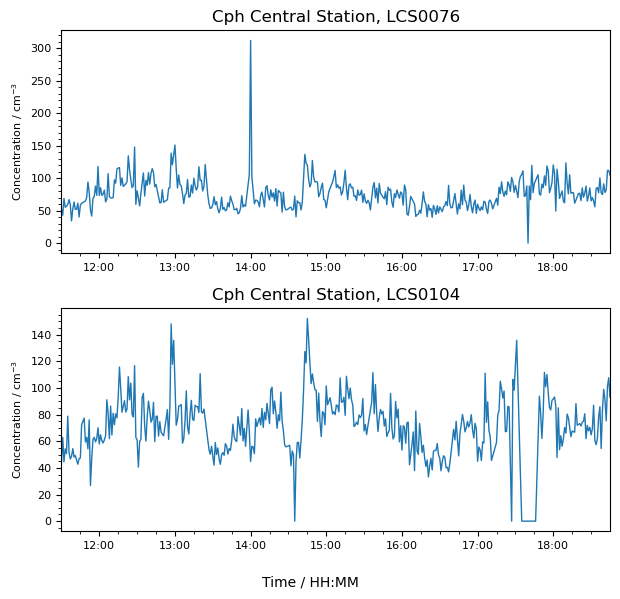

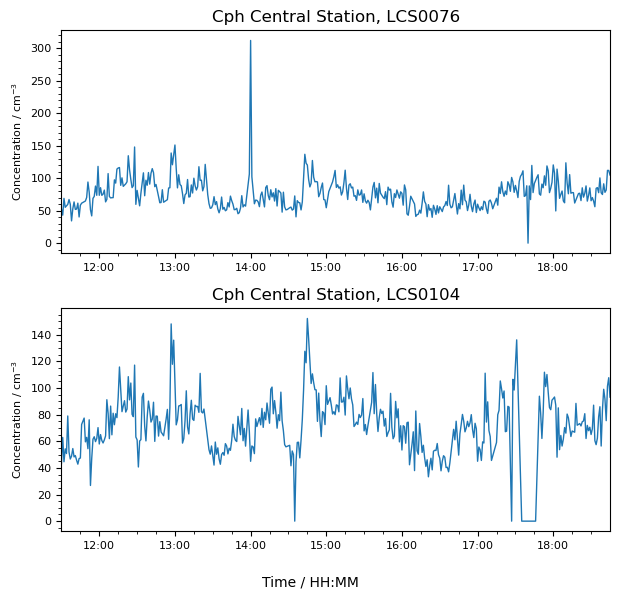

In [5]:
fig1, ax1 = plt.subplots(2, 1, figsize = (6.3, 6))
fig2, ax2 = plt.subplots(2, 1, figsize = (6.3, 6))
fig3, ax3 = plt.subplots(2, 1, figsize = (6.3, 6))
figs = [fig1, fig2, fig3]
axs = [ax1, ax2, ax3]

for i, fig in enumerate(figs):
    plot_LCS(axs[i], fig, LCS, ['2024-09-17 LCS0076', '2024-09-17 LCS0104'], '2024-09-17 11:30:00', '2024-09-17 18:45:00', df_keys[i], 'Time', ['Concentration / cm$^{-3}$', 'Concentration / cm$^{-3}$'], 'tab:blue')
    for ax, ttl in zip(axs[i], titles):
        ax.set(title = f'Cph Central Station, {ttl}')
    fig.tight_layout()
    PN = df_keys[i].split('<')
    fig.savefig(f'Screening/CphC_screening_{PN[0]}{PN[1]}.png', dpi = 600)

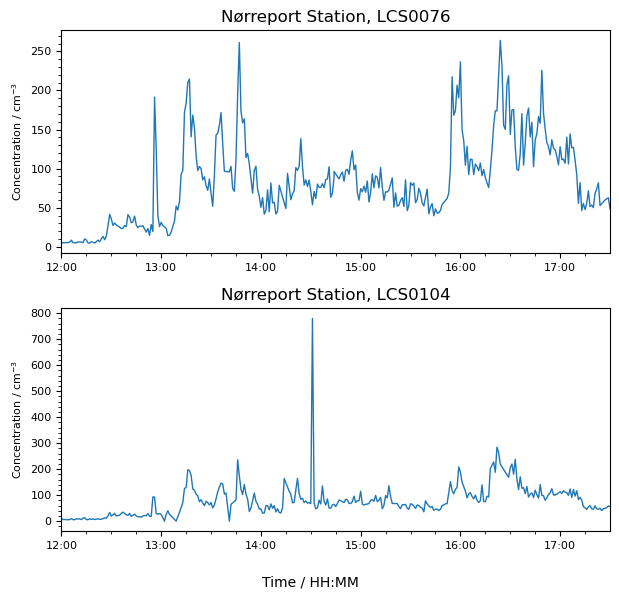

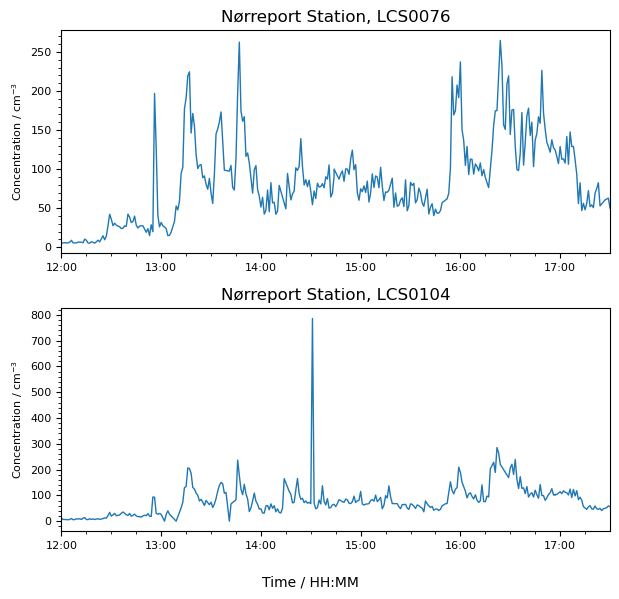

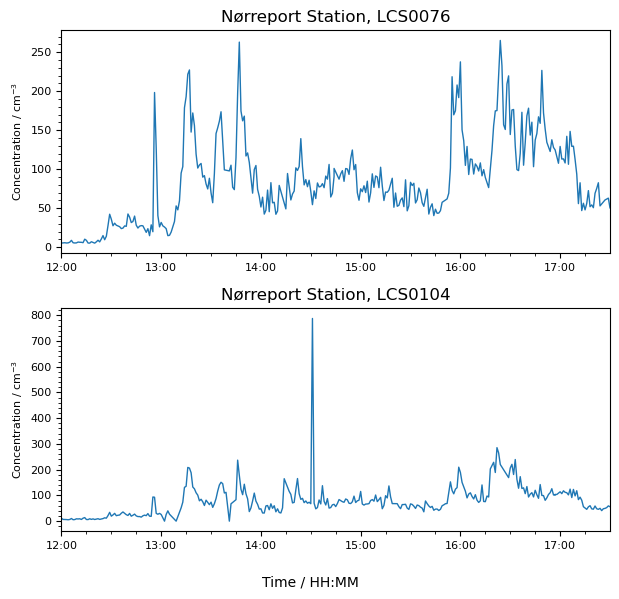

In [6]:
fig1, ax1 = plt.subplots(2, 1, figsize = (6.3, 6))
fig2, ax2 = plt.subplots(2, 1, figsize = (6.3, 6))
fig3, ax3 = plt.subplots(2, 1, figsize = (6.3, 6))
figs = [fig1, fig2, fig3]
axs = [ax1, ax2, ax3]

for i, fig in enumerate(figs):
    plot_LCS(axs[i], fig, LCS, ['2024-09-19 LCS0076', '2024-09-19 LCS0104'], '2024-09-19 12:00:00', '2024-09-19 17:30:00', df_keys[i], 'Time', ['Concentration / cm$^{-3}$', 'Concentration / cm$^{-3}$'], 'tab:blue')
    for ax, ttl in zip(axs[i], titles):
        ax.set(title = f'Nørreport Station, {ttl}')
    fig.tight_layout()
    PN = df_keys[i].split('<')
    fig.savefig(f'Screening/Nørreport_screening_{PN[0]}{PN[1]}.png', dpi = 600)

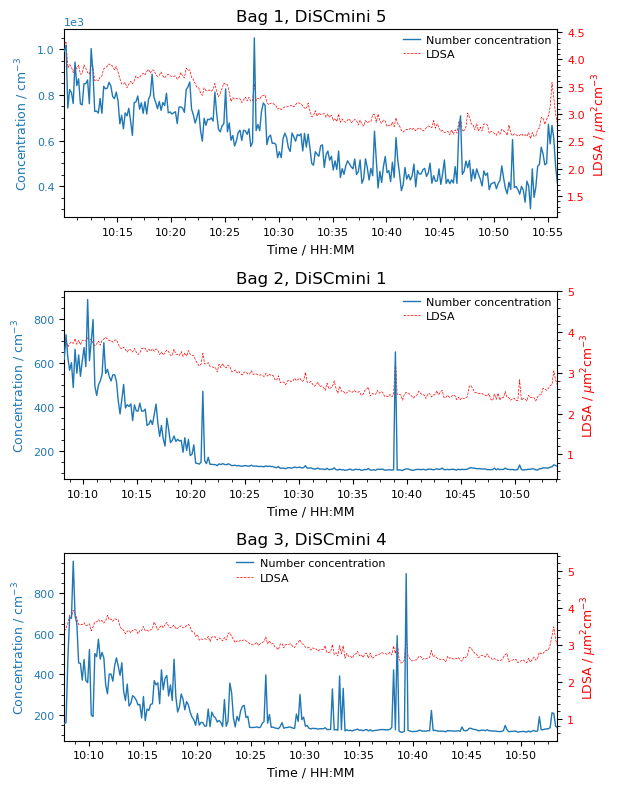

In [7]:
discmini_titles = ['Bag 1, DiSCmini 5', 'Bag 2, DiSCmini 1', 'Bag 3, DiSCmini 4']

fig, axes = plt.subplots(3, 1, figsize = (6.3, 8))

discmini_multi_timeseries(axes, discmini, discmini_names[:3], [4, 10, 10], discmini_titles)

fig.tight_layout()
fig.savefig('Screening/discmini_before.png', dpi = 600)
plt.show()

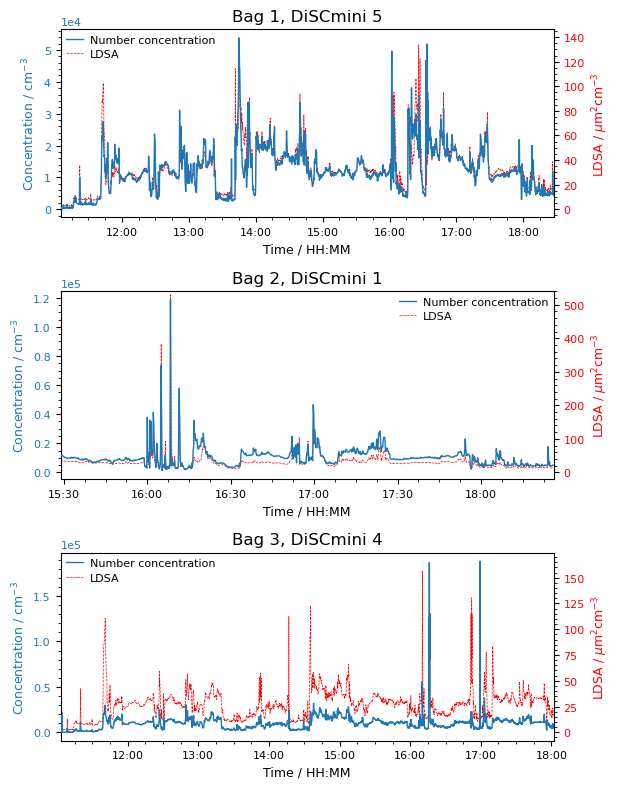

In [8]:
fig, axes = plt.subplots(3, 1, figsize = (6.3, 8))

discmini_multi_timeseries(axes, discmini, discmini_names[3:6], [21, 28, 20], discmini_titles)

fig.tight_layout()
fig.savefig('Screening/discmini_CPHcentral.png', dpi = 600)
plt.show()

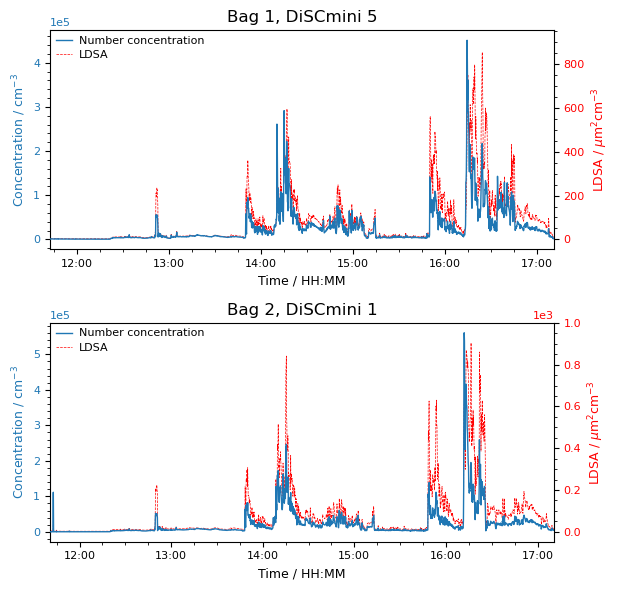

In [9]:
fig, axes = plt.subplots(2, 1, figsize = (6.3, 6))

discmini_multi_timeseries(axes, discmini, discmini_names[6:], [20, 20], ['Bag 1, DiSCmini 5', 'Bag 2, DiSCmini 1'])

fig.tight_layout()
fig.savefig('Screening/discmini_Nørreport.png', dpi = 600)
plt.show()

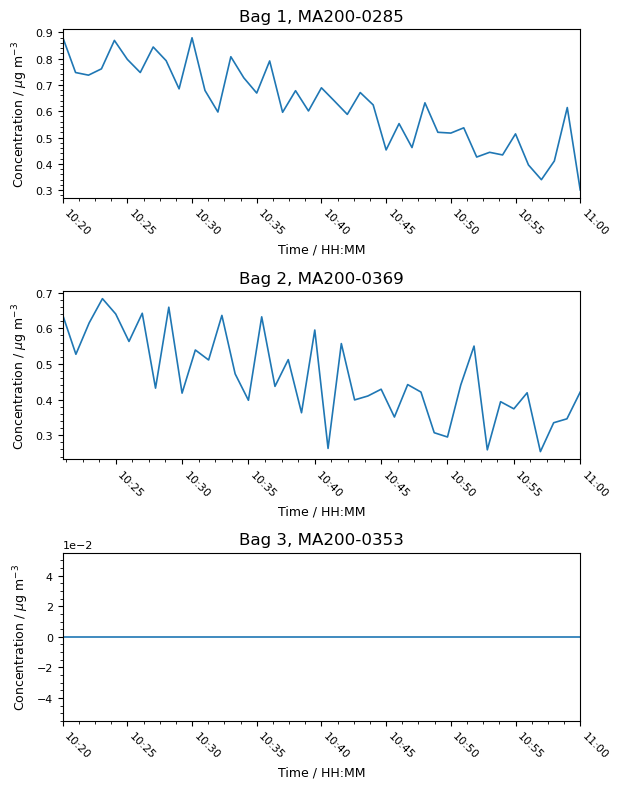

In [10]:
lab_timestamps = ['2024-09-17 10:10:00', '2024-09-17 11:00:00']

fig, ax = plt.subplots(3, 1, figsize = (6.3, 8))

ma_multi_timeseries(ax, ma200, ['MA200-0285_240917101603', 'MA200-0369_240917101700', 'MA200-0353_240917101600'], True, lab_timestamps, 1)

fig.tight_layout()
fig.savefig('Screening/ma200_before.png', dpi = 600)
plt.show()

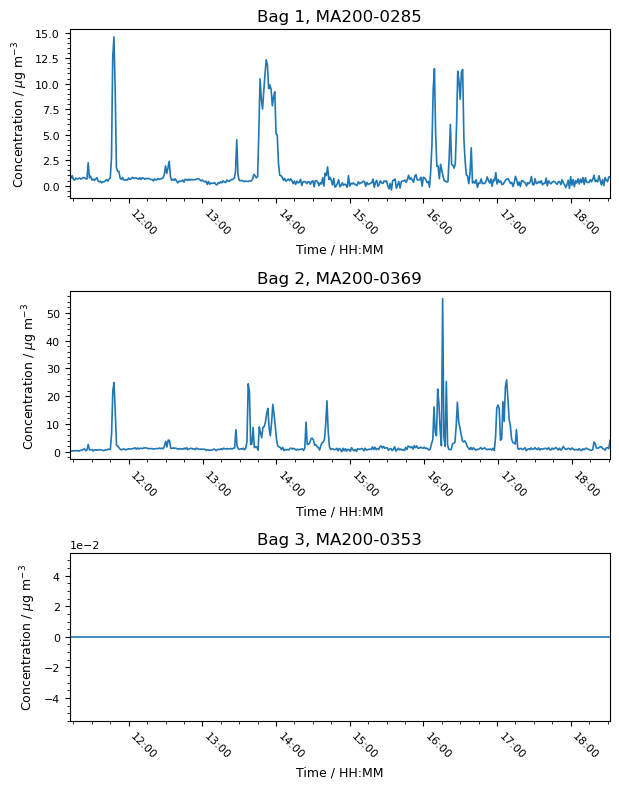

In [11]:
CPH_timestamps = ['2024-09-17 11:10:00', '2024-09-17 18:35:00']

fig, ax = plt.subplots(3, 1, figsize = (6.3, 8))

ma_multi_timeseries(ax, ma200, ['MA200-0285_240917110800', 'MA200-0369_240917110806', 'MA200-0353_240917110801'], True, CPH_timestamps, 1)

fig.tight_layout()
fig.savefig('Screening/ma200_CPHcentral.png', dpi = 600)
plt.show()

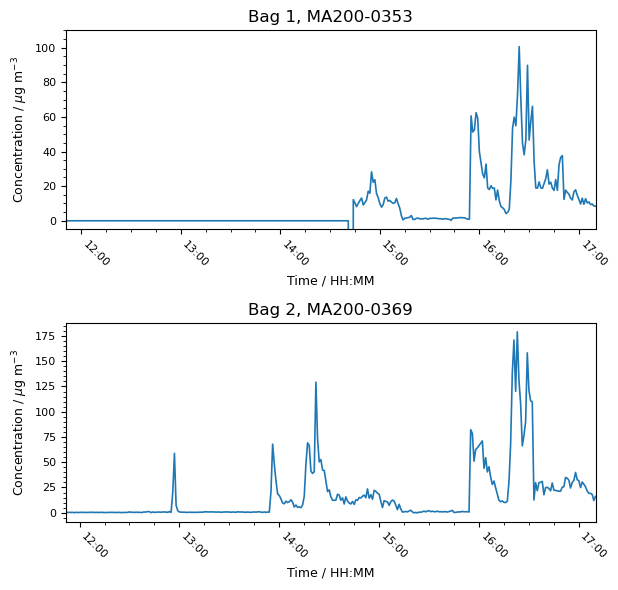

In [12]:
NP_timestamps = ['2024-09-19 11:50:00', '2024-09-19 17:10:00']

fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

ma_multi_timeseries(ax, ma200, ['MA200-0353_240919114700', 'MA200-0369_240919114800'], True, NP_timestamps, 1)
ax[0].set_ylim(-5, 110)

fig.tight_layout()
fig.savefig('Screening/ma200_Nørreport.png', dpi = 600)
plt.show()

In [13]:
timestamp = np.array([['11:36:00', '11:48:00', '11:54:00', '12:01:00', '12:39:00', '12:50:00', '12:56:00', '13:11:00', 
                       '13:30:00', '13:45:00', '13:48:00', '14:03:00', '14:06:00', '14:21:00', '14:24:00', '14:39:00', '14:42:00', '14:57:00', '15:00:00', '15:15:00', '15:18:00', '15:32:00', '15:40:00', '15:49:00',
                       '16:05:10', '16:20:00', '16:23:00', '16:38:00', '16:41:00', '16:56:00', '16:59:00', '17:14:00', '17:17:00', '17:32:00', '17:35:00', '17:50:00', '18:15:00', '18:27:10'],     # Bag 1 outside rushhour CPH central
                      ['11:36:00', '11:48:00', '11:54:00', '12:01:00', '12:39:00', '12:50:00', '12:56:00', '13:11:00', 
                       '13:30:00', '13:45:00', '13:48:00', '14:03:00', '14:06:00', '14:21:00', '14:24:00', '14:39:00', '14:42:00', '14:57:00', '15:00:00', '15:15:00', '15:18:00', '15:32:00', '15:40:00', '15:49:00',
                       '16:06:00', '16:21:00', '16:22:00', '16:37:00', '16:40:00', '16:55:00', '16:58:00', '17:13:00', '17:16:00', '17:31:00', '17:33:00', '17:48:00', '18:15:00', '18:26:10'],
                      ['11:36:05', '11:48:05', '11:54:05', '12:01:05', '12:39:05', '12:50:05', '12:56:05', '13:11:05', 
                       '13:30:05', '13:45:05', '13:48:05', '14:03:05', '14:06:05', '14:21:05', '14:25:05', '14:40:05', '14:44:05', '14:59:05', '14:59:05', '15:14:05', '15:16:05', '15:31:05', '15:40:05', '15:49:05',
                       '16:08:05', '16:23:05', '16:25:05', '16:40:05', '16:41:05', '16:56:05', '17:00:05', '17:15:05', '17:18:05', '17:33:05', '17:33:05', '17:48:05', '18:15:05', '18:30:05']], dtype = object)     # Bag 3 outside rushhour CPH central  

dm_CPHcentral = get_mean_conc(discmini, discmini_names[3:6], 'Time', timestamp, 'Number', 'Screening/dm_CPHcentral.csv')
display(dm_CPHcentral)

timestamp = np.array([['12:41:03', '12:45:03', '12:45:03', '12:55:03', '13:09:03', '13:50:03', '13:56:03', '14:11:03', '14:15:03', '14:30:03', '13:34:03', '14:50:03', '14:54:03', '15:10:03',
                       '15:55:03', '16:10:03', '16:13:03', '16:29:03', '16:51:03', '17:08:03', '16:31:03', '16:48:03'],
                      ['12:41:07', '12:45:07', '12:45:07', '12:55:07', '13:09:07', '13:50:07', '13:56:07', '14:11:07', '14:15:07', '14:30:07', '13:34:07', '14:50:07', '14:54:07', '15:10:07',
                       '15:55:07', '16:10:07', '16:13:07', '16:29:07', '16:51:07', '17:08:07', '16:31:07', '16:48:07']], dtype = object)

dm_nørreport = get_mean_conc(discmini, discmini_names[6:], 'Time', timestamp, 'Number', 'Screening/dm_nørreport.csv')
display(dm_nørreport)

[ 185.  257.  293.  335.  557.  623.  659.  743.  857.  947.  965. 1055.
 1067. 1157. 1175. 1265. 1283. 1373. 1391. 1475. 1493. 1577. 1625. 1679.
 1770. 1859. 1877. 1967. 1985. 2075. 2093. 2177. 2195. 2285. 2303. 2393.
 2537. 2610.]
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.   19.   67.  121.
  223.  313.  319.  403.  421.  511.  529.  619.  637.  721.  733.  823.
  985. 1052.]
[ 198.  270.  306.  348.  570.  636.  672.  756.  870.  960.  978. 1062.
 1080. 1170. 1194. 1284. 1308. 1398. 1398. 1482. 1494. 1584. 1638. 1692.
 1800. 1890. 1902. 1992. 1998. 2088. 2112. 2196. 2214. 2304. 2304. 2394.
    0.    0.]


,dm5_20240917_1105 time start,dm5_20240917_1105 time end,dm5_20240917_1105,dm1_20240917_1528 time start,dm1_20240917_1528 time end,dm1_20240917_1528,dm4_20240917_1103 time start,dm4_20240917_1103 time end,dm4_20240917_1103
0,2024-09-17 11:36:00.500,2024-09-17 11:48:00.500,10252.527778,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 11:36:05.500,2024-09-17 11:48:05.500,10823.541667
1,2024-09-17 11:54:00.500,2024-09-17 12:01:00.500,13142.476190,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 11:54:05.500,2024-09-17 12:01:05.500,10376.000000
2,2024-09-17 12:39:00.500,2024-09-17 12:50:00.500,12059.000000,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 12:39:05.500,2024-09-17 12:50:05.500,11404.075758
3,2024-09-17 12:56:00.500,2024-09-17 13:11:00.500,11515.142857,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 12:56:05.500,2024-09-17 13:11:05.500,11184.202381
4,2024-09-17 13:30:00.500,2024-09-17 13:45:00.500,8460.111111,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 13:30:05.500,2024-09-17 13:45:05.500,4053.244444
5,2024-09-17 13:48:00.500,2024-09-17 14:03:00.500,14805.311111,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 13:48:05.500,2024-09-17 14:03:05.500,8516.297619
6,2024-09-17 14:06:00.500,2024-09-17 14:21:00.500,18605.855556,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 14:06:05.500,2024-09-17 14:21:05.500,7770.622222
7,2024-09-17 14:24:00.500,2024-09-17 14:39:00.500,16494.644444,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 14:25:05.500,2024-09-17 14:40:05.500,9528.077778
8,2024-09-17 14:42:00.500,2024-09-17 14:57:00.500,13368.588889,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 14:44:05.500,2024-09-17 14:59:05.500,18116.722222
9,2024-09-17 15:00:00.500,2024-09-17 15:15:00.500,11548.809524,2024-09-17 15:28:50.500,2024-09-17 15:28:50.500,NaN,2024-09-17 14:59:05.500,2024-09-17 15:14:05.500,16638.095238


[ 351.  369.  369.  429.  513.  753.  789.  879.  903.  993.  663. 1107.
 1131. 1227. 1491. 1581. 1599. 1695. 1821. 1923. 1707. 1803.]
[ 357.  381.  381.  441.  525.  765.  801.  891.  915. 1005.  675. 1119.
 1143. 1239. 1503. 1593. 1611. 1707. 1833. 1935. 1719. 1815.]


,dm5_20240919_1142 time start,dm5_20240919_1142 time end,dm5_20240919_1142,dm1_20240919_1140 time start,dm1_20240919_1140 time end,dm1_20240919_1140
0,2024-09-19 12:41:03.500,2024-09-19 12:45:03.500,2929.555556,2024-09-19 12:41:07.500,2024-09-19 12:45:07.500,2412.666667
1,2024-09-19 12:45:03.500,2024-09-19 12:55:03.500,12213.683333,2024-09-19 12:45:07.500,2024-09-19 12:55:07.500,11822.933333
2,2024-09-19 13:09:03.500,2024-09-19 13:50:03.500,6677.895833,2024-09-19 13:09:07.500,2024-09-19 13:50:07.500,8425.100000
3,2024-09-19 13:56:03.500,2024-09-19 14:11:03.500,27126.288889,2024-09-19 13:56:07.500,2024-09-19 14:11:07.500,32179.488889
4,2024-09-19 14:15:03.500,2024-09-19 14:30:03.500,69908.722222,2024-09-19 14:15:07.500,2024-09-19 14:30:07.500,57457.188889
5,2024-09-19 13:34:03.500,2024-09-19 14:50:03.500,35973.873874,2024-09-19 13:34:07.500,2024-09-19 14:50:07.500,34251.777027
6,2024-09-19 14:54:03.500,2024-09-19 15:10:03.500,26816.156250,2024-09-19 14:54:07.500,2024-09-19 15:10:07.500,17717.718750
7,2024-09-19 15:55:03.500,2024-09-19 16:10:03.500,29218.355556,2024-09-19 15:55:07.500,2024-09-19 16:10:07.500,21916.844444
8,2024-09-19 16:13:03.500,2024-09-19 16:29:03.500,130791.708333,2024-09-19 16:13:07.500,2024-09-19 16:29:07.500,114497.812500
9,2024-09-19 16:51:03.500,2024-09-19 17:08:03.500,22913.009804,2024-09-19 16:51:07.500,2024-09-19 17:08:07.500,22665.931373


In [14]:
timestamp = np.array([['11:40:', '11:52:', '11:58:', '12:05:', '12:47:', '12:54:', '13:00:', '13:15:', 
                       '13:34:', '13:49:', '13:52:', '14:07:', '14:10:', '14:25:', '14:28:', '14:43:', '14:46:', '15:01:', '15:04:', '15:19:', '15:22:', '15:36:', '15:44:', '15:53:',
                       '16:09:', '16:24:', '16:27:', '16:42:', '16:45:', '17:00:', '17:03:', '17:18:', '17:21:', '17:36:', '17:39:', '17:54:', '18:19:', '18:30:'],     # Bag 1 outside rushhour CPH central
                      ['11:40:', '11:52:', '11:58:', '12:05:', '12:47:', '12:54:', '13:00:', '13:15:', 
                       '13:34:', '13:49:', '13:52:', '14:07:', '14:10:', '14:25:', '14:28:', '14:43:', '14:46:', '15:01:', '15:04:', '15:19:', '15:22:', '15:36:', '15:44:', '15:53:',
                       '16:09:', '16:24:', '16:27:', '16:42:', '16:45:', '17:00:', '17:03:', '17:18:', '17:21:', '17:36:', '17:39:', '17:54:', '18:19:', '18:30:']], dtype = object)     # Bag 3 outside rushhour CPH central  

ma_CPHcentral = get_mean_conc(ma200, ['MA200-0285_240917110800', 'MA200-0369_240917110806'], 'Time', timestamp, 'IR BCc', 'Screening/ma_CPHcentral.csv')
display(ma_CPHcentral)

timestamp = np.array([['12:45:', '12:49:', '12:49:', '12:59:', '13:13:', '13:54:', '14:00:', '14:15:', '14:19:', '14:34:', '14:38:', '14:54:', '14:58:', '15:13:',
                       '15:59:', '16:14:', '16:17:', '16:33:', '16:53:', '17:12:', '16:35:', '16:52:'],
                      ['12:45:', '12:49:', '12:49:', '12:59:', '13:13:', '13:54:', '14:00:', '14:15:', '14:19:', '14:34:', '14:38:', '14:54:', '14:58:', '15:13:',
                       '15:59:', '16:16:', '16:19:', '16:35:', '16:57:', '17:16:', '16:37:', '16:56:']], dtype = object)

ma_nørreport = get_mean_conc(ma200, ['MA200-0353_240919114700', 'MA200-0369_240919114800'], 'Time', timestamp, 'IR BCc', 'Screening/ma_nørreport.csv')
display(ma_nørreport)

[ 28.  40.  46.  53.  95. 102. 108. 123. 142. 157. 160. 175. 178. 193.
 196. 211. 214. 229. 232. 247. 250. 264. 272. 281. 297. 312. 315. 330.
 333. 348. 351. 366. 369. 384. 387. 402. 427. 438.]
[ 28.  40.  46.  53.  95. 102. 108. 123. 142. 157. 160. 175. 178. 193.
 196. 211. 214. 229. 232. 247. 250. 264. 272. 281. 297. 312. 315. 330.
 333. 348. 351. 366. 369. 384. 387. 402. 427. 438.]


,MA200-0285_240917110800 time start,MA200-0285_240917110800 time end,MA200-0285_240917110800,MA200-0369_240917110806 time start,MA200-0369_240917110806 time end,MA200-0369_240917110806
0,2024-09-17 11:36:00,2024-09-17 11:48:00,3.822167,2024-09-17 11:36:00,2024-09-17 11:48:00,6.326583
1,2024-09-17 11:54:00,2024-09-17 12:01:00,0.666714,2024-09-17 11:54:00,2024-09-17 12:01:00,0.978857
2,2024-09-17 12:43:00,2024-09-17 12:50:00,0.570857,2024-09-17 12:43:00,2024-09-17 12:50:00,1.072714
3,2024-09-17 12:56:00,2024-09-17 13:11:00,0.274200,2024-09-17 12:56:00,2024-09-17 13:11:00,0.689733
4,2024-09-17 13:30:00,2024-09-17 13:45:00,2.113867,2024-09-17 13:30:00,2024-09-17 13:45:00,6.126067
5,2024-09-17 13:48:00,2024-09-17 14:03:00,6.292333,2024-09-17 13:48:00,2024-09-17 14:03:00,7.084267
6,2024-09-17 14:06:00,2024-09-17 14:21:00,0.388800,2024-09-17 14:06:00,2024-09-17 14:21:00,1.553400
7,2024-09-17 14:24:00,2024-09-17 14:39:00,0.490467,2024-09-17 14:24:00,2024-09-17 14:39:00,4.748800
8,2024-09-17 14:42:00,2024-09-17 14:57:00,0.169333,2024-09-17 14:42:00,2024-09-17 14:57:00,0.697867
9,2024-09-17 15:00:00,2024-09-17 15:15:00,0.214533,2024-09-17 15:00:00,2024-09-17 15:15:00,0.863733


[ 54.  58.  58.  68.  82. 123. 129. 144. 148. 163. 167. 183. 187. 202.
 248. 263. 266. 282. 302. 321. 284. 301.]
[ 53.  57.  57.  67.  81. 122. 128. 143. 147. 162. 166. 182. 186. 201.
 247. 262. 265. 281. 301. 320. 283. 300.]


,MA200-0353_240919114700 time start,MA200-0353_240919114700 time end,MA200-0353_240919114700,MA200-0369_240919114800 time start,MA200-0369_240919114800 time end,MA200-0369_240919114800
0,2024-09-19 12:41:00,2024-09-19 12:45:00,0.000000,2024-09-19 12:41:00,2024-09-19 12:45:00,0.543250
1,2024-09-19 12:45:00,2024-09-19 12:55:00,0.000000,2024-09-19 12:45:00,2024-09-19 12:55:00,9.124300
2,2024-09-19 13:09:00,2024-09-19 13:50:00,0.000000,2024-09-19 13:09:00,2024-09-19 13:50:00,0.678000
3,2024-09-19 13:56:00,2024-09-19 14:11:00,0.000000,2024-09-19 13:56:00,2024-09-19 14:11:00,9.488400
4,2024-09-19 14:15:00,2024-09-19 14:30:00,0.000000,2024-09-19 14:15:00,2024-09-19 14:30:00,41.664800
5,2024-09-19 14:34:00,2024-09-19 14:50:00,-53530.217250,2024-09-19 14:34:00,2024-09-19 14:50:00,13.465438
6,2024-09-19 14:54:00,2024-09-19 15:09:00,11.172867,2024-09-19 14:54:00,2024-09-19 15:09:00,11.360800
7,2024-09-19 15:55:00,2024-09-19 16:10:00,24.089533,2024-09-19 15:55:00,2024-09-19 16:10:00,33.503667
8,2024-09-19 16:13:00,2024-09-19 16:29:00,52.254562,2024-09-19 16:13:00,2024-09-19 16:29:00,105.694312
9,2024-09-19 16:49:00,2024-09-19 17:08:00,11.977789,2024-09-19 16:49:00,2024-09-19 17:08:00,21.009211


In [25]:
# CPH Central:
timestamp = np.array([['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:48:', '14:03:', '14:06:', '14:21:', '14:25:', '14:40:', '14:44:', '14:59:', '14:59:', '15:14:', '15:16:', '15:31:', '15:40:', '15:49:',
                       '16:08:', '16:23:', '16:25:', '16:40:', '16:41:', '16:56:', '17:00:', '17:15:', '17:18:', '17:33:', '17:33:', '17:48:', '18:15:', '18:30:'],
                      ['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:48:', '14:03:', '14:06:', '14:21:', '14:24:', '14:39:', '14:42:', '14:57:', '15:00:', '15:15:', '15:18:', '15:32:', '15:40:', '15:49:',
                       '16:06:', '16:21:', '16:22:', '16:37:', '16:40:', '16:55:', '16:58:', '17:13:', '17:16:', '17:31:', '17:33:', '17:48:', '18:15:', '18:26:']
                      ], dtype = object)

LCS_PN1_CPHcentral = get_mean_conc(LCS, ['2024-09-17 LCS0076', '2024-09-17 LCS0104'], 'Time', timestamp, 'PN<1', 'Screening/LCS_PN1_CPHcentral.csv')
display(LCS_PN1_CPHcentral)
LCS_PN25_CPHcentral = get_mean_conc(LCS, ['2024-09-17 LCS0076', '2024-09-17 LCS0104'], 'Time', timestamp, 'PN<2.5', 'Screening/LCS_PN25_CPHcentral.csv')
display(LCS_PN25_CPHcentral)
LCS_PN10_CPHcentral = get_mean_conc(LCS, ['2024-09-17 LCS0076', '2024-09-17 LCS0104'], 'Time', timestamp, 'PN<10', 'Screening/LCS_PN10_CPHcentral.csv')
display(LCS_PN10_CPHcentral)

# Nørreport:
timestamp = np.array([['12:41:', '12:45:', '12:45:', '12:55:', '13:09:', '13:50:', '13:56:', '14:11:', '14:15:', '14:30:', '13:34:', '14:50:', '14:54:', '15:10:',
                       '15:55:', '16:10:', '16:13:', '16:29:', '16:51:', '17:08:', '16:31:', '16:48:'],
                      ['12:41:', '12:45:', '12:45:', '12:55:', '13:09:', '13:50:', '13:56:', '14:11:', '14:15:', '14:30:', '13:34:', '14:50:', '14:54:', '15:10:',
                       '15:55:', '16:10:', '16:13:', '16:29:', '16:51:', '17:08:', '16:31:', '16:48:']], dtype = object)	

LCS_PN1_nørreport = get_mean_conc(LCS, ['2024-09-19 LCS0076', '2024-09-19 LCS0104'], 'Time', timestamp, 'PN<1', 'Screening/LCS_PN1_nørreport.csv')
display(LCS_PN1_nørreport)
LCS_PN25_nørreport = get_mean_conc(LCS, ['2024-09-19 LCS0076', '2024-09-19 LCS0104'], 'Time', timestamp, 'PN<2.5', 'Screening/LCS_PN25_nørreport.csv')
display(LCS_PN25_nørreport)
LCS_PN10_nørreport = get_mean_conc(LCS, ['2024-09-19 LCS0076', '2024-09-19 LCS0104'], 'Time', timestamp, 'PN<10', 'Screening/LCS_PN10_nørreport.csv')
display(LCS_PN10_nørreport)

[ 692.    0.  708.  715.  752.  763.  767.  782.  800.  815.  818.  831.
  834.  849.  853.  867.  871.  886.  886.  898.  900.  915.  923.  931.
    0.  963.  965.  980.    0.  995.  999. 1012. 1015. 1030. 1030. 1044.
 1071. 1084.]
[ 691.  702.  708.  715.  752.    0.  767.  782.    0.  812.  815.  829.
  832.  847.  850.  863.  866.  881.  884.  898.  901.  915.  921.  930.
  947.  961.  962.  977.    0.  993.  996.    0. 1012. 1025.    0.    0.
 1056. 1066.]


,2024-09-17 LCS0076 time start,2024-09-17 LCS0076 time end,2024-09-17 LCS0076,2024-09-17 LCS0104 time start,2024-09-17 LCS0104 time end,2024-09-17 LCS0104
0,2024-09-17 11:36:00,2024-09-17 00:00:00,NaN,2024-09-17 11:36:00,2024-09-17 11:48:00,49.976779
1,2024-09-17 11:54:00,2024-09-17 12:01:00,75.608810,2024-09-17 11:54:00,2024-09-17 12:01:00,59.318751
2,2024-09-17 12:39:00,2024-09-17 12:50:00,88.653432,2024-09-17 12:39:00,2024-09-17 00:00:00,NaN
3,2024-09-17 12:56:00,2024-09-17 13:11:00,98.938359,2024-09-17 12:56:00,2024-09-17 13:11:00,90.165466
4,2024-09-17 13:30:00,2024-09-17 13:45:00,57.815843,2024-09-17 00:00:00,2024-09-17 13:45:00,17.833909
5,2024-09-17 13:48:00,2024-09-17 14:03:00,83.595885,2024-09-17 13:48:00,2024-09-17 14:03:00,64.647713
6,2024-09-17 14:06:00,2024-09-17 14:21:00,71.769228,2024-09-17 14:06:00,2024-09-17 14:21:00,81.353796
7,2024-09-17 14:25:00,2024-09-17 14:40:00,56.552654,2024-09-17 14:24:00,2024-09-17 14:39:00,54.735138
8,2024-09-17 14:44:00,2024-09-17 14:59:00,94.232625,2024-09-17 14:42:00,2024-09-17 14:57:00,104.131292
9,2024-09-17 14:59:00,2024-09-17 15:14:00,83.279414,2024-09-17 15:00:00,2024-09-17 15:15:00,88.500107


[ 692.    0.  708.  715.  752.  763.  767.  782.  800.  815.  818.  831.
  834.  849.  853.  867.  871.  886.  886.  898.  900.  915.  923.  931.
    0.  963.  965.  980.    0.  995.  999. 1012. 1015. 1030. 1030. 1044.
 1071. 1084.]
[ 691.  702.  708.  715.  752.    0.  767.  782.    0.  812.  815.  829.
  832.  847.  850.  863.  866.  881.  884.  898.  901.  915.  921.  930.
  947.  961.  962.  977.    0.  993.  996.    0. 1012. 1025.    0.    0.
 1056. 1066.]


,2024-09-17 LCS0076 time start,2024-09-17 LCS0076 time end,2024-09-17 LCS0076,2024-09-17 LCS0104 time start,2024-09-17 LCS0104 time end,2024-09-17 LCS0104
0,2024-09-17 11:36:00,2024-09-17 00:00:00,NaN,2024-09-17 11:36:00,2024-09-17 11:48:00,50.387258
1,2024-09-17 11:54:00,2024-09-17 12:01:00,76.387103,2024-09-17 11:54:00,2024-09-17 12:01:00,60.102010
2,2024-09-17 12:39:00,2024-09-17 12:50:00,89.381031,2024-09-17 12:39:00,2024-09-17 00:00:00,NaN
3,2024-09-17 12:56:00,2024-09-17 13:11:00,99.895981,2024-09-17 12:56:00,2024-09-17 13:11:00,90.838916
4,2024-09-17 13:30:00,2024-09-17 13:45:00,58.275464,2024-09-17 00:00:00,2024-09-17 13:45:00,18.217339
5,2024-09-17 13:48:00,2024-09-17 14:03:00,84.269871,2024-09-17 13:48:00,2024-09-17 14:03:00,65.206362
6,2024-09-17 14:06:00,2024-09-17 14:21:00,72.432917,2024-09-17 14:06:00,2024-09-17 14:21:00,82.103268
7,2024-09-17 14:25:00,2024-09-17 14:40:00,57.098261,2024-09-17 14:24:00,2024-09-17 14:39:00,55.121451
8,2024-09-17 14:44:00,2024-09-17 14:59:00,94.873848,2024-09-17 14:42:00,2024-09-17 14:57:00,105.108831
9,2024-09-17 14:59:00,2024-09-17 15:14:00,83.894894,2024-09-17 15:00:00,2024-09-17 15:15:00,89.049705


[ 692.    0.  708.  715.  752.  763.  767.  782.  800.  815.  818.  831.
  834.  849.  853.  867.  871.  886.  886.  898.  900.  915.  923.  931.
    0.  963.  965.  980.    0.  995.  999. 1012. 1015. 1030. 1030. 1044.
 1071. 1084.]
[ 691.  702.  708.  715.  752.    0.  767.  782.    0.  812.  815.  829.
  832.  847.  850.  863.  866.  881.  884.  898.  901.  915.  921.  930.
  947.  961.  962.  977.    0.  993.  996.    0. 1012. 1025.    0.    0.
 1056. 1066.]


,2024-09-17 LCS0076 time start,2024-09-17 LCS0076 time end,2024-09-17 LCS0076,2024-09-17 LCS0104 time start,2024-09-17 LCS0104 time end,2024-09-17 LCS0104
0,2024-09-17 11:36:00,2024-09-17 00:00:00,NaN,2024-09-17 11:36:00,2024-09-17 11:48:00,50.476264
1,2024-09-17 11:54:00,2024-09-17 12:01:00,76.555600,2024-09-17 11:54:00,2024-09-17 12:01:00,60.286307
2,2024-09-17 12:39:00,2024-09-17 12:50:00,89.534210,2024-09-17 12:39:00,2024-09-17 00:00:00,NaN
3,2024-09-17 12:56:00,2024-09-17 13:11:00,100.104729,2024-09-17 12:56:00,2024-09-17 13:11:00,90.979442
4,2024-09-17 13:30:00,2024-09-17 13:45:00,58.369073,2024-09-17 00:00:00,2024-09-17 13:45:00,18.311332
5,2024-09-17 13:48:00,2024-09-17 14:03:00,84.408125,2024-09-17 13:48:00,2024-09-17 14:03:00,65.328952
6,2024-09-17 14:06:00,2024-09-17 14:21:00,72.577076,2024-09-17 14:06:00,2024-09-17 14:21:00,82.269902
7,2024-09-17 14:25:00,2024-09-17 14:40:00,57.216610,2024-09-17 14:24:00,2024-09-17 14:39:00,55.204739
8,2024-09-17 14:44:00,2024-09-17 14:59:00,95.002093,2024-09-17 14:42:00,2024-09-17 14:57:00,105.327683
9,2024-09-17 14:59:00,2024-09-17 15:14:00,84.023607,2024-09-17 15:00:00,2024-09-17 15:15:00,89.162422


[ 757.  761.  761.  771.  784.  823.  828.  843.  844.  859.  809.  878.
  882.  898.  940.  955.  958.  973.  995. 1012.  975.  992.]
[ 759.  763.  763.  773.  783.  819.  825.  840.    0.  857.  806.  876.
  880.  896.  938.  952.  955.  967.  989. 1006.  969.  986.]


,2024-09-19 LCS0076 time start,2024-09-19 LCS0076 time end,2024-09-19 LCS0076,2024-09-19 LCS0104 time start,2024-09-19 LCS0104 time end,2024-09-19 LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,34.924418,2024-09-19 12:41:00,2024-09-19 12:45:00,24.312724
1,2024-09-19 12:45:00,2024-09-19 12:55:00,24.010757,2024-09-19 12:45:00,2024-09-19 12:55:00,19.791127
2,2024-09-19 13:09:00,2024-09-19 13:50:00,120.934070,2024-09-19 13:09:00,2024-09-19 13:50:00,102.312965
3,2024-09-19 13:56:00,2024-09-19 14:11:00,62.653566,2024-09-19 13:56:00,2024-09-19 14:11:00,55.102313
4,2024-09-19 14:15:00,2024-09-19 14:30:00,85.924810,2024-09-19 00:00:00,2024-09-19 14:30:00,18.053733
5,2024-09-19 13:34:00,2024-09-19 14:50:00,91.831224,2024-09-19 13:34:00,2024-09-19 14:50:00,91.006044
6,2024-09-19 14:54:00,2024-09-19 15:10:00,83.043343,2024-09-19 14:54:00,2024-09-19 15:10:00,77.932170
7,2024-09-19 15:55:00,2024-09-19 16:10:00,148.381796,2024-09-19 15:55:00,2024-09-19 16:10:00,123.114916
8,2024-09-19 16:13:00,2024-09-19 16:29:00,144.551308,2024-09-19 16:13:00,2024-09-19 16:29:00,173.204038
9,2024-09-19 16:51:00,2024-09-19 17:08:00,124.245548,2024-09-19 16:51:00,2024-09-19 17:08:00,105.042837


[ 757.  761.  761.  771.  784.  823.  828.  843.  844.  859.  809.  878.
  882.  898.  940.  955.  958.  973.  995. 1012.  975.  992.]
[ 759.  763.  763.  773.  783.  819.  825.  840.    0.  857.  806.  876.
  880.  896.  938.  952.  955.  967.  989. 1006.  969.  986.]


,2024-09-19 LCS0076 time start,2024-09-19 LCS0076 time end,2024-09-19 LCS0076,2024-09-19 LCS0104 time start,2024-09-19 LCS0104 time end,2024-09-19 LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,35.647549,2024-09-19 12:41:00,2024-09-19 12:45:00,24.767705
1,2024-09-19 12:45:00,2024-09-19 12:55:00,24.427786,2024-09-19 12:45:00,2024-09-19 12:55:00,20.299094
2,2024-09-19 13:09:00,2024-09-19 13:50:00,124.124703,2024-09-19 13:09:00,2024-09-19 13:50:00,105.639899
3,2024-09-19 13:56:00,2024-09-19 14:11:00,63.461413,2024-09-19 13:56:00,2024-09-19 14:11:00,55.601449
4,2024-09-19 14:15:00,2024-09-19 14:30:00,86.460254,2024-09-19 00:00:00,2024-09-19 14:30:00,18.518372
5,2024-09-19 13:34:00,2024-09-19 14:50:00,93.193034,2024-09-19 13:34:00,2024-09-19 14:50:00,92.145391
6,2024-09-19 14:54:00,2024-09-19 15:10:00,83.812109,2024-09-19 14:54:00,2024-09-19 15:10:00,78.698872
7,2024-09-19 15:55:00,2024-09-19 16:10:00,149.237384,2024-09-19 15:55:00,2024-09-19 16:10:00,123.865266
8,2024-09-19 16:13:00,2024-09-19 16:29:00,145.449956,2024-09-19 16:13:00,2024-09-19 16:29:00,174.073687
9,2024-09-19 16:51:00,2024-09-19 17:08:00,125.652164,2024-09-19 16:51:00,2024-09-19 17:08:00,105.788153


[ 757.  761.  761.  771.  784.  823.  828.  843.  844.  859.  809.  878.
  882.  898.  940.  955.  958.  973.  995. 1012.  975.  992.]
[ 759.  763.  763.  773.  783.  819.  825.  840.    0.  857.  806.  876.
  880.  896.  938.  952.  955.  967.  989. 1006.  969.  986.]


,2024-09-19 LCS0076 time start,2024-09-19 LCS0076 time end,2024-09-19 LCS0076,2024-09-19 LCS0104 time start,2024-09-19 LCS0104 time end,2024-09-19 LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,35.823066,2024-09-19 12:41:00,2024-09-19 12:45:00,24.877131
1,2024-09-19 12:45:00,2024-09-19 12:55:00,24.528884,2024-09-19 12:45:00,2024-09-19 12:55:00,20.428101
2,2024-09-19 13:09:00,2024-09-19 13:50:00,124.911020,2024-09-19 13:09:00,2024-09-19 13:50:00,106.477551
3,2024-09-19 13:56:00,2024-09-19 14:11:00,63.644887,2024-09-19 13:56:00,2024-09-19 14:11:00,55.713563
4,2024-09-19 14:15:00,2024-09-19 14:30:00,86.565097,2024-09-19 00:00:00,2024-09-19 14:30:00,18.634175
5,2024-09-19 13:34:00,2024-09-19 14:50:00,93.512119,2024-09-19 13:34:00,2024-09-19 14:50:00,92.411304
6,2024-09-19 14:54:00,2024-09-19 15:10:00,83.979728,2024-09-19 14:54:00,2024-09-19 15:10:00,78.872370
7,2024-09-19 15:55:00,2024-09-19 16:10:00,149.398392,2024-09-19 15:55:00,2024-09-19 16:10:00,124.013361
8,2024-09-19 16:13:00,2024-09-19 16:29:00,145.621261,2024-09-19 16:13:00,2024-09-19 16:29:00,174.233026
9,2024-09-19 16:51:00,2024-09-19 17:08:00,125.966856,2024-09-19 16:51:00,2024-09-19 17:08:00,105.943992


MA200: f(x)=0.5162594058539569x+0.14480717589508574, R2=0.3994981061468792


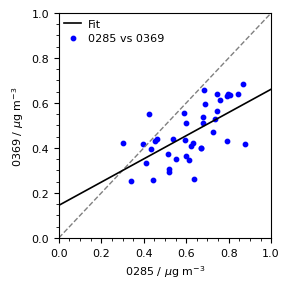

In [16]:
x_plot = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (3,3))

fit_params, squares, ndof, R2 = plot_reference_same(ax, ma200, ['MA200-0285_240917101603', 'MA200-0369_240917101700'], 'IR BCc', 'Time', x_plot, ['0285 / $\mu$g m$^{-3}$', '0369 / $\mu$g m$^{-3}$'], linear)
print(f'MA200: f(x)={fit_params[0]}x+{fit_params[1]}, R2={R2}')

fig.tight_layout()
fig.savefig('ma0285_vs_ma0369.png', dpi = 600)
plt.show()

DiSCmini 1 vs 5: f(x)=0.6121643618244013x+-171.32313320458158, R2=0.4218610659990661
DiSCmini 4 vs 5: f(x)=0.3957321253106852x+-43.58939977323607, R2=0.29383982730208497
DiSCmini 4 vs 1: f(x)=0.5940241113849926x+82.61590897484002, R2=0.5159441298994836


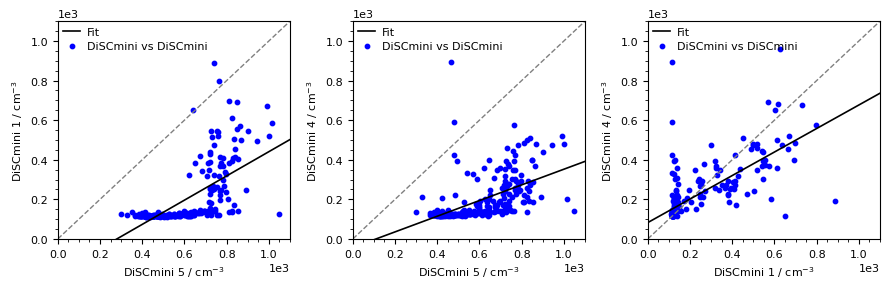

In [17]:
x_plot = np.linspace(0, 1100, 100)

fig, ax = plt.subplots(1, 3, figsize = (9, 3))

fit_params_15, squares_15, ndof_15, R2_15 = plot_reference_same(ax[0], discmini, discmini_names[:2], 'Number', 'Time', x_plot, ['DiSCmini 5 / cm$^{-3}$', 'DiSCmini 1 / cm$^{-3}$'], linear)
fit_params_45, squares_45, ndof_45, R2_45 = plot_reference_same(ax[1], discmini, [discmini_names[0], discmini_names[2]], 'Number', 'Time', x_plot, ['DiSCmini 5 / cm$^{-3}$', 'DiSCmini 4 / cm$^{-3}$'], linear)
fit_params_41, squares_41, ndof_41, R2_41 = plot_reference_same(ax[2], discmini, discmini_names[1:3], 'Number', 'Time', x_plot, ['DiSCmini 1 / cm$^{-3}$', 'DiSCmini 4 / cm$^{-3}$'], linear)
print(f'DiSCmini 1 vs 5: f(x)={fit_params_15[0]}x+{fit_params_15[1]}, R2={R2_15}')
print(f'DiSCmini 4 vs 5: f(x)={fit_params_45[0]}x+{fit_params_45[1]}, R2={R2_45}')
print(f'DiSCmini 4 vs 1: f(x)={fit_params_41[0]}x+{fit_params_41[1]}, R2={R2_41}')

fig.tight_layout()
fig.savefig('discmini_corr.png', dpi = 600)
plt.show()